Imports

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [29]:
df1 = pd.read_csv('MEA_data_for_plotting_Rep1.csv')
df1 = df1.dropna(subset=['Treatment/ID'])
df2 = pd.read_csv('MEA_data_for_plotting_Rep1.csv')
df2 = df2.dropna(subset=['Treatment/ID'])

feature_to_plot = 'Mean Firing Rate (Hz)'

df = pd.concat([df1, df2], ignore_index=True)

print(df['Treatment/ID'].unique().tolist())

['Tripli Tyr9', 'Tripli DMSO', 'Tripli TIC10', 'WT TIC10', 'WT Tyr9', 'WT DMSO']


Normalize data

In [30]:
# Get the unique replicates
replicates = df['Replicate'].unique()

# Initialize an empty dataframe to store the results
normalized_df = pd.DataFrame()

for replicate in replicates:
    # Subset the dataframe for each replicate
    df_replicate = df[df['Replicate'] == replicate]
    
    # Calculate the median firing rate at timepoint 0
    median_rate_at_0 = df_replicate[df_replicate['Timepoint (h)'] == 0][feature_to_plot].median()
    
    # Normalize the 'Firing rate (Hz)' column
    df_replicate[feature_to_plot] = df_replicate[feature_to_plot] / median_rate_at_0
    
    # Append the normalized dataframe of this replicate to the result dataframe
    normalized_df = pd.concat([normalized_df, df_replicate])

# Reset the index of the resulting dataframe
normalized_df.reset_index(drop=True, inplace=True)

df = normalized_df
# Delete all rows for which column 'Treatment/ID' contains 'TIC10|DMSO'
df = df[~df['Treatment/ID'].str.contains('TIC10|DMSO')]

Plotting of all data

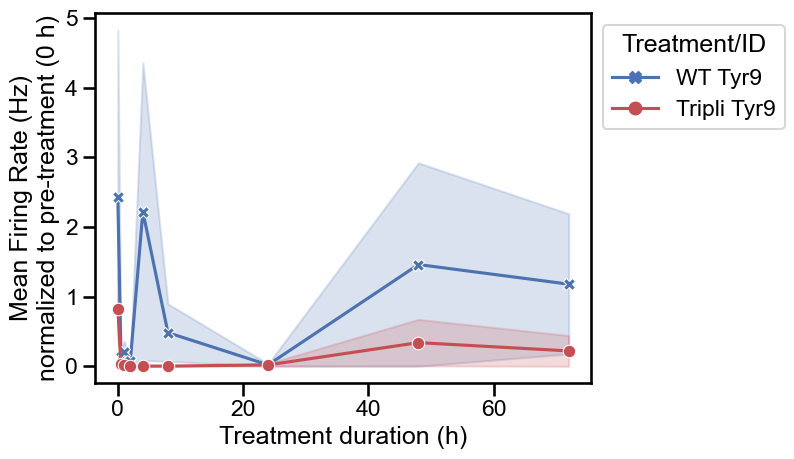

In [47]:
# Color palette as dictionary
palette = {
    'WT Tyr9':'#4C72B0', # blue
    'Tripli Tyr9':'#C44E52', # red
    }

hue_order = ['WT Tyr9', 'Tripli Tyr9']

sns.set_context("talk")
plt.rcParams['font.sans-serif'] = 'Arial'

ax = sns.lineplot(data=df, x="Timepoint (h)", y=feature_to_plot, hue='Treatment/ID', hue_order=hue_order, palette=palette, markers=True, style='Treatment/ID', dashes=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel('Mean Firing Rate (Hz)\nnormalized to pre-treatment (0 h)')
ax.set_xlabel('Treatment duration (h)')
# Save the plot
plt.savefig('MEA_' + feature_to_plot + '.pdf', bbox_inches='tight')
